In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from datetime import datetime, date, time

In [2]:
# Skip footer 
SP500 = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls','Data', header=7, skipfooter=1)
SP500

,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,Earnings,Earnings.1,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15
0,1871.01,4.440000,0.260000,0.400000,12.464061,1871.041667,5.320000,92.530300,5.418441,9.253030e+01,8.336063,8.336063,NaN,NaN,NaN,NaN
1,1871.02,4.500000,0.260000,0.400000,12.844641,1871.125000,5.323333,91.002035,5.257895,9.144019e+01,8.089070,8.128017,NaN,NaN,NaN,NaN
2,1871.03,4.610000,0.260000,0.400000,13.034972,1871.208333,5.326667,91.865279,5.181122,9.274143e+01,7.970957,8.046979,NaN,NaN,NaN,NaN
3,1871.04,4.740000,0.260000,0.400000,12.559226,1871.291667,5.330000,98.033842,5.377384,9.942122e+01,8.272898,8.389976,NaN,NaN,NaN,NaN
4,1871.05,4.860000,0.260000,0.400000,12.273812,1871.375000,5.333333,102.853101,5.502429,1.047737e+02,8.465276,8.623350,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,2020.04,2761.975238,59.613736,110.083333,256.389000,2020.291667,0.660000,2798.214253,60.395909,1.746167e+06,111.527702,69596.511995,25.927359,NaN,28.407963,NaN
1792,2020.05,2919.615000,59.646868,103.103333,256.394000,2020.375000,0.670000,2957.864673,60.428297,1.848936e+06,104.454083,65293.340255,27.329646,NaN,29.953171,NaN
1793,2020.06,3104.660909,59.680000,96.490000,257.797000,2020.458333,0.730000,3128.217105,60.132814,1.958554e+06,97.222105,60870.044885,28.843644,NaN,31.619674,NaN
1794,2020.07,3207.619091,NaN,NaN,259.101000,2020.541667,0.620000,3215.690722,NaN,2.013320e+06,NaN,NaN,29.610927,NaN,32.417381,NaN


In [3]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1796 non-null   float64
 1   P            1796 non-null   float64
 2   D            1794 non-null   float64
 3   E            1794 non-null   float64
 4   CPI          1796 non-null   float64
 5   Fraction     1796 non-null   float64
 6   Rate GS10    1796 non-null   float64
 7   Price        1796 non-null   float64
 8   Dividend     1794 non-null   float64
 9   Price.1      1796 non-null   float64
 10  Earnings     1794 non-null   float64
 11  Earnings.1   1794 non-null   float64
 12  CAPE         1676 non-null   float64
 13  Unnamed: 13  0 non-null      float64
 14  TR CAPE      1676 non-null   float64
 15  Unnamed: 15  1 non-null      float64
dtypes: float64(16)
memory usage: 224.6 KB


Extract Shiller S&P500 monthly data beginning 1926. Compute monthly returns . Compute the mean and standard deviation of monthly returns.

1.a.Compute the actual 1% VaR from historic S&P 500 returns.

b. Draw 10,000 samples from a normal distribution with mean and standard deviation equal to historical mean and standard deviation of monthly returns. Compute the 1% VaR of the samples

c. In what percentage of the samples is the 1% VaR lower than the historical VaR

d. Repeat 1a-1c for 1% Expected Shortfall (ES) instead of 1% VaR

e. What do you learn from the results? 

2. Assume you start with $100 as initial investment and plan to invest for 5 years

a. Draw 60 monthly returns from normal distribution  with mean and standard deviation equal to historical mean and standard deviation of monthly returns. Assume these are the monthly returns for the $100 investment in the next 60 months

b. Compute the total returns over 5 year holding period (that is if you invest $100 and sold it 5 years later what is the returns you will get)

c. Repeat a - b 10,000 times. Plot the distribution of 10,000 total returns (5 year returns)

d. Comment on the distribution in c

# Extract Shiller S&P500 monthly data beginning 1926. Compute monthly returns . Compute the mean and standard deviation of monthly returns.

In [4]:
# extract data beginning 1926
SP500 = SP500[SP500["Date"] >= 1926.0]

# change data type
SP500.shape

(1136, 16)

In [5]:
# change data type of date, 
year=np.floor(SP500["Date"])
month=(SP500["Date"]-year)*100
SP500["Date_1"]=pd.to_datetime({"year":year,"month":month, "day":1})+pd.offsets.MonthEnd(1)

SP500.head()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,Earnings,Earnings.1,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Date_1
660,1926.01,12.65,0.6075,1.249,17.9,1926.041667,3.680000,183.568461,8.815640,3331.259126,18.124665,328.912462,11.340966,NaN,16.018851,NaN,1926-01-31
661,1926.02,12.67,0.6150,1.248,17.9,1926.125000,3.651667,183.858688,8.924475,3350.022147,18.110153,329.978504,11.389436,NaN,16.041273,NaN,1926-02-28
662,1926.03,11.81,0.6225,1.248,17.8,1926.208333,3.623333,172.341738,9.084059,3153.969107,18.211896,333.289877,10.712352,NaN,15.046869,NaN,1926-03-31
663,1926.04,11.48,0.6300,1.247,17.9,1926.291667,3.595000,166.590192,9.142145,3062.654257,18.095642,332.676817,10.395588,NaN,14.562367,NaN,1926-04-30
664,1926.05,11.56,0.6375,1.246,17.8,1926.375000,3.566667,168.693521,9.302952,3115.575022,18.182710,335.813709,10.575158,NaN,14.771860,NaN,1926-05-31


Compute monthly returns . Compute the mean and standard deviation of monthly returns.

In [6]:
# monthly returns
SP500["Returns"] = (SP500["P"]+SP500["D"]/12)/SP500["P"].shift(1)-1

# Returns
Returns = SP500["Returns"].dropna()
Returns

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


661     0.005632
662    -0.063783
663    -0.023497
664     0.011596
665     0.052228
          ...   
1789    0.001232
1790   -0.189166
1791    0.043187
1792    0.058875
1793    0.065084
Name: Returns, Length: 1133, dtype: float64

In [7]:
# the mean
mean_of_return = Returns.mean()
print("the mean of monthly return is:",mean_of_return)

# standard deviation
stdv = Returns.std()
print("the standard deviation of monthly return is:",stdv)

the mean of monthly return is: 0.009011333630266495
the standard deviation of monthly return is: 0.0448539054948628


## 1.a.Compute the actual 1% VaR from historic S&P 500 returns.

In [8]:
VaR_1 = np.percentile(Returns, 1)
VaR_1

-0.13088424120425424

## 1.b.Draw 10,000 samples from a normal distribution with mean and standard deviation equal to historical mean and standard deviation of monthly returns. Compute the 1% VaR of the samples

In [9]:
# normal distribution
miu, sigma, n = mean_of_return, stdv, len(SP500)

# draw 10,000 samples
sample_var1 = [None] * 10000
for i in list(range(0,10000)):
    normal = np.random.normal(miu, sigma, n)
    sample_var1[i] = np.percentile(normal, 1)

In [10]:
sample_var1

[-0.08410917236217018,
 -0.08481190747154255,
 -0.09470592131365024,
 -0.08787692367679976,
 -0.09319761737431265,
 -0.09046206023626746,
 -0.09720718243602991,
 -0.0974791378337122,
 -0.09331957765437503,
 -0.10419020141773724,
 -0.09594626939435455,
 -0.09457162761330681,
 -0.088836646627346,
 -0.09700430622103198,
 -0.10199227939394068,
 -0.09545142445452903,
 -0.10056045296750345,
 -0.09095902432495427,
 -0.09348686277524673,
 -0.09455684988318626,
 -0.09693588810228032,
 -0.08951746635694192,
 -0.094763106094723,
 -0.09238343204843884,
 -0.09512997166985201,
 -0.09838975574508271,
 -0.09089124359861159,
 -0.08860024918240506,
 -0.08696782790887507,
 -0.1003168588556125,
 -0.08975647164056594,
 -0.09141953616995971,
 -0.10067137002313625,
 -0.09201281207622528,
 -0.100866080295618,
 -0.09144241686910605,
 -0.09310467626930925,
 -0.09680524419558248,
 -0.09352749566330829,
 -0.09849923561134998,
 -0.09319040417624094,
 -0.0975098711582044,
 -0.09593768804917883,
 -0.1007002411503476

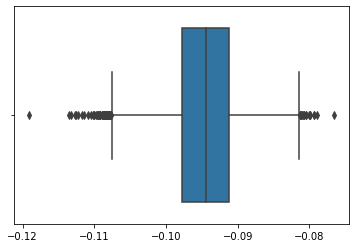

In [11]:
sns.boxplot(sample_var1)

## 1.c. In what percentage of the samples is the 1% VaR lower than the historical VaR

In [12]:
df1 = pd.DataFrame(sample_var1 < VaR_1, columns = {"compare"})
df1.compare.value_counts()

False    10000
Name: compare, dtype: int64

0% percent of the samples is the 1% VaR lower than the historical VaR

## 1.d. Repeat 1a-1c for 1% Expected Shortfall (ES) instead of 1% VaR

### a.Compute the actual 1%ES from historic S&P 500 returns.

In [17]:
ES = np.mean(Returns[Returns < VaR_1])
ES

-0.16939592710368956

### b.Draw 10,000 samples from a normal distribution with mean and standard deviation equal to historical mean and standard deviation of monthly returns. Compute the 1% ES of the samples¶

In [18]:
# draw 10,000 samples
sample_es1 = [None] * 10000
for i in list(range(0,10000)):
    normal = np.random.normal(miu, sigma, n)
    sample_es1[i] = np.percentile(normal, 1)

### c. In what percentage of the samples is the 1% VaR lower than the historical VaR

In [20]:
df2= pd.DataFrame(sample_es1 < VaR_1, columns = {"compare"})
df2.compare.value_counts()

False    10000
Name: compare, dtype: int64

## 1. e. What do you learn from the results?

VaR和ES非常极端？

Stress Testing未必能测出extreme events?

# 2. Assume you start with $100 as initial investment and plan to invest for 5 years

## a. Draw 60 monthly returns from normal distribution with mean and standard deviation equal to historical mean and standard deviation of monthly returns. Assume these are the monthly returns for the $100 investment in the next 60 months



In [49]:
# draw 60 monthly returns with normal distribution
n= 60
next_month_return = np.random.normal(mean_of_return, stdv, n)

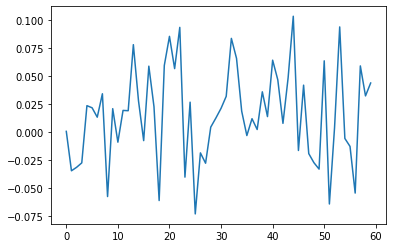

In [50]:
# plot the returns
plt.plot(next_month_return)

## b. Compute the total returns over 5 year holding period (that is if you invest $100 and sold it 5 years later what is the returns you will get)


In [61]:
# set variables
present_value = next_month_return+1
returns = 100

# calculate returns
for n in present_value:
    returns = returns*n

# result
print(returns)

242.2745590597486


## c. Repeat a - b 10,000 times. Plot the distribution of 10,000 total returns (5 year returns)


In [66]:
def next_n_month_return(mean, std, n):
    return np.random.normal(mean, std, n)

def cal_present_value(next_month_returns, initial):
    
    returns = initial
    present_value = next_month_returns+1
    
    for n in present_value:
        returns = returns * n
        
    return returns

In [79]:
def trails(times):
    trails = [None] * 10000 # number of trails
    
    
    for i in list(range(0,10000)):
        next_month_return = next_n_month_return(mean_of_return, stdv, 60)
        trails[i] = cal_present_value(next_month_return, 100)
        
    return trails

In [103]:
returns = pd.DataFrame(trails(10000))

Text(0, 0.5, '')

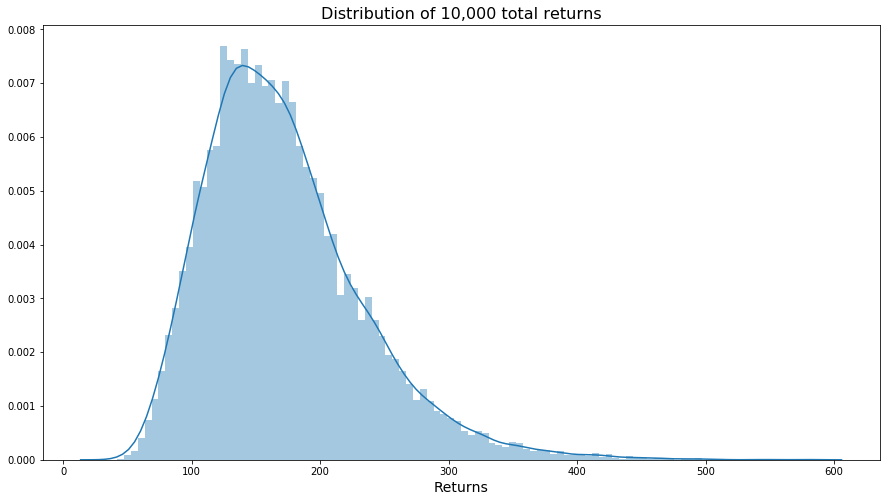

In [119]:
# graph
plt.figure(figsize = (15,8))
sns.distplot(returns[0],bins = 100)
plt.title("Distribution of 10,000 total returns", size = 16)
plt.xlabel("Returns",size = 14)

## d. Comment on the distribution in c

出现极端值（600）概率很小？